In [83]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [17]:
oak_hist_bud = pd.read_csv('data/oakland_budget_history_depts.csv')

In [18]:
oak_hist_bud.head()

,budget_type,fiscal_year_range,department,total,general_fund
0,1,FY13-14,Administrative Services,50539644,29017007.0
1,1,FY13-14,Capital Improvement Projects,27455500,252000.0
2,1,FY13-14,City Administrator,29885269,14782414.0
3,1,FY13-14,City Attorney,12520583,4705200.0
4,1,FY13-14,City Auditor,1556461,1556461.0


In [19]:
oak_hist_bud.department.unique()

array(['Administrative Services', 'Capital Improvement Projects',
       'City Administrator', 'City Attorney', 'City Auditor',
       'City Clerk', 'City Council', 'Community Services', 'Fire',
       'Housing & Community Development', 'Mayor', 'Non-Departmental',
       'Planning & Building', 'Police', 'Public Library', 'Public Works',
       'Economic & Workforce Development', 'Finance',
       'Human Resources Management', 'Human Services',
       'Information Technology', 'Parks & Recreation',
       'Public Ethics Commission', 'Race & Equity', 'Police Commission',
       'Transportation', 'Department of Violence Prevention',
       'Finance Department', 'Fire Department',
       'Human Resources Management Department', 'Non',
       'Oakland Parks, Recreation & Youth Development',
       'Oakland Public Library', 'Oakland Public Works',
       'Police Department', 'Department of Transportation',
       'Economic and Workforce Development',
       'Housing and Community Developmen

**Observation**: There are more than one department that has police title.

In [21]:
oak_hist_bud.fiscal_year_range.unique()

array(['FY13-14', 'FY15-16', 'FY17-18', 'FY19-20', 'FY14-15', 'FY16-17',
       'FY18-19', 'FY20-21'], dtype=object)

In [22]:
# updating column names with the year mapper below

year_mapper = {'FY13-14': 2013, 'FY15-16': 2015, 'FY17-18': 2017, 'FY19-20': 2019,
               'FY14-15': 2014, 'FY16-17': 2016, 'FY18-19': 2018, 'FY20-21': 2020}

oak_hist_bud['year'] = oak_hist_bud.fiscal_year_range.map(year_mapper)

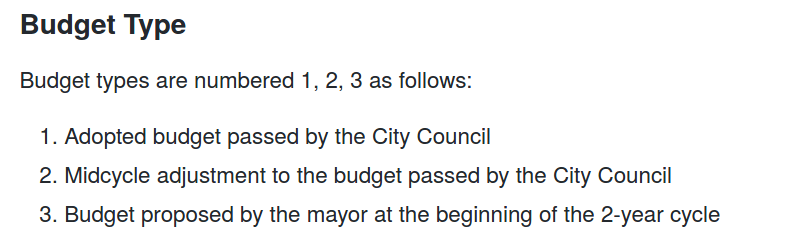

In [24]:
# Take only the adopted budget
adopted_budgets = oak_hist_bud.query('budget_type == 1')

In [117]:
# filter only for data that fall under policing
police = adopted_budgets[adopted_budgets['department'].str.contains(
    'police', case=False)]
police = police.groupby('year', as_index=False)['total'].sum()
race = adopted_budgets[adopted_budgets['department'].str.contains(
    'race', case=False)]
race = race.groupby('year', as_index=False)['total'].sum()
vio_pre = adopted_budgets[adopted_budgets['department'].str.contains(
    'violence', case=False)]
vio_pre = vio_pre.groupby('year', as_index=False)['total'].sum()

In [116]:
final_df = df_consol['department'].map(temp_dict)

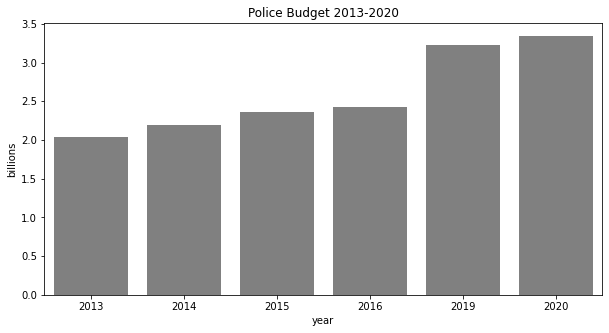

In [135]:
plt.figure(figsize=(10,5))
p = sns.barplot(x='year', y='total', 
                 data=police, ci=None, color='grey')

p_style = FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/10**8))
p.yaxis.set_major_formatter(p_style)
plt.ylabel('billions')
plt.title('Police Budget 2013-2020')
plt.show()

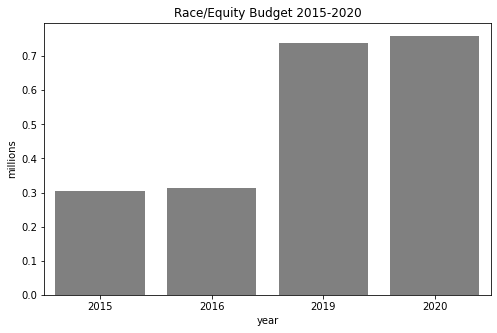

In [142]:
plt.figure(figsize=(8,5))
r = sns.barplot(x='year', y='total', 
                 data=race, ci=None, color='grey')
r_style = FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/10**6))
r.yaxis.set_major_formatter(r_style)
plt.ylabel('millions')
plt.title('Race/Equity Budget 2015-2020')
plt.show()

In [132]:
vio_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    2 non-null      int64
 1   total   2 non-null      int64
dtypes: int64(2)
memory usage: 48.0 bytes


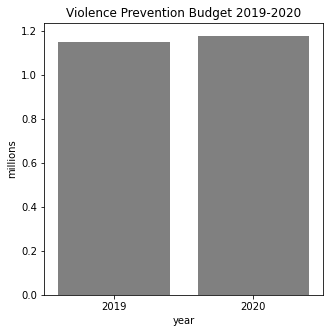

In [143]:
plt.figure(figsize=(5,5))

v = sns.barplot(x='year', y='total', 
                 data=vio_pre, ci=None, color='grey')
v_style = FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/10**6))
v.yaxis.set_major_formatter(v_style)
plt.ylabel('millions')
plt.title('Violence Prevention Budget 2019-2020')
plt.show()